In [2]:
from germeval.dataset import add_labels
from datasets import load_dataset
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = Path("../data/germeval24/germeval-competition-traindev.jsonl")
test_path = Path("../data/germeval24/germeval-competition-test.jsonl")

In [4]:
train_ds = load_dataset("json", data_files=str(train_path))
train_ds = train_ds.map(add_labels)
test_ds = load_dataset("json", data_files=str(test_path))

In [5]:
mean_no_annotations = np.array(
    [len(annotations) for annotations in train_ds["train"]["annotations"]]
).mean()
print(mean_no_annotations)

4.863287762587529


In [6]:
train_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'annotations', 'bin_maj', 'bin_one', 'bin_all', 'multi_maj', 'disagree_bin', 'multi_all'],
        num_rows: 5998
    })
})

In [7]:
test_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'annotators'],
        num_rows: 1986
    })
})

## Label Distribution


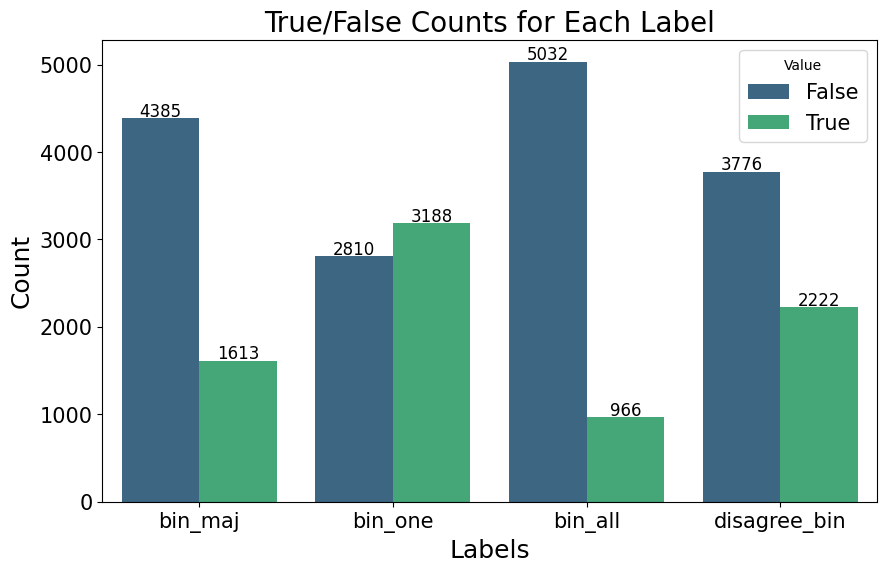

In [49]:
data = {
    "bin_maj": train_ds["train"]["bin_maj"],
    "bin_one": train_ds["train"]["bin_one"],
    "bin_all": train_ds["train"]["bin_all"],
    "disagree_bin": train_ds["train"]["disagree_bin"],
}
df = pd.DataFrame(data)

counts = {
    "bin_maj": df["bin_maj"].value_counts(),
    "bin_one": df["bin_one"].value_counts(),
    "bin_all": df["bin_all"].value_counts(),
    "disagree_bin": df["disagree_bin"].value_counts(),
}

count_df = (
    pd.DataFrame(counts)
    .reset_index()
    .melt(id_vars="index", var_name="label", value_name="count")
)
count_df.columns = ["value", "label", "count"]
count_df["value"] = count_df["value"].map({1: "True", 0: "False"})

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x="label", y="count", hue="value", data=count_df, palette="viridis"
)

for p in bar_plot.patches:
    if p.get_x() == 0 and p.get_width() == 0:
        continue
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
        ),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=12,
    )

plt.title("True/False Counts for Each Label", fontsize=20)
plt.xlabel("Labels", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend(title="Value", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("misc/label_distribution.pdf", format="pdf")
plt.show()

/tmp/ipykernel_469541/3135345136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x="multi_maj", data=df, palette="viridis", width=0.7)


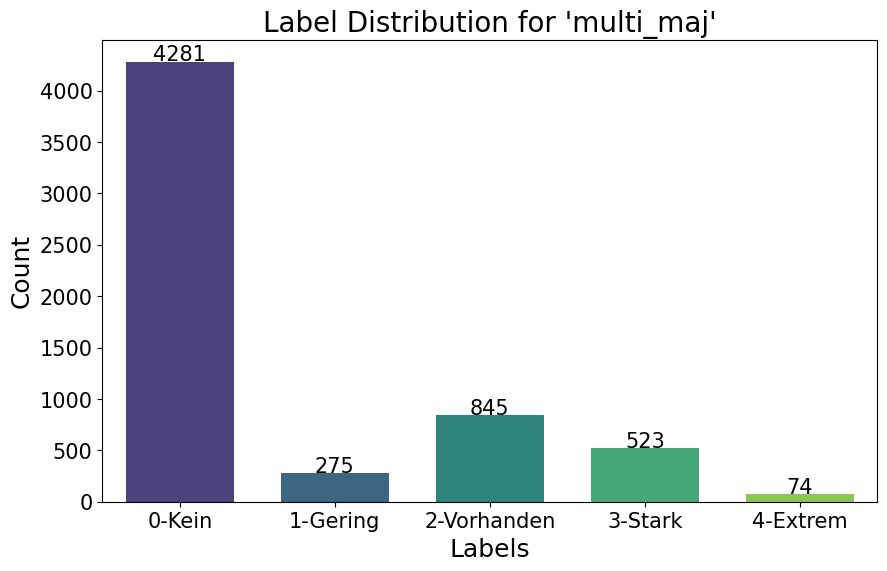

In [48]:
data = {
    "multi_maj": train_ds["train"]["multi_maj"],
}
df = pd.DataFrame(data)
df = df.sort_values("multi_maj")

plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x="multi_maj", data=df, palette="viridis", width=0.7)
for p in count_plot.patches:
    if p.get_x() == 0 and p.get_width() == 0:
        continue
    count_plot.annotate(
        format(p.get_height(), ".0f"),
        (
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
        ),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=15,
    )

plt.title("Label Distribution for 'multi_maj'", fontsize=20)
plt.xlabel("Labels", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.savefig("misc/label_distribution_multi_maj.pdf", format="pdf")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()